## Distribuciones en forma de anillo

In [20]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

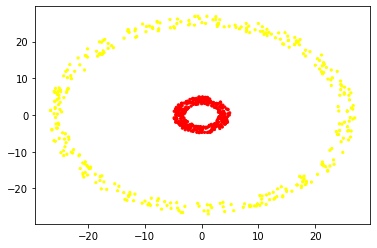

In [32]:
data1 = ring(3,5)
data2 = ring(24,27)  
data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")            

## Algoritmo de kmeans

In [22]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(2).fit(data)

In [37]:
clust = km.predict(data)

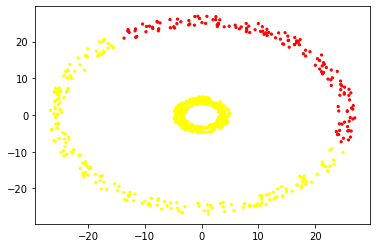

In [38]:
# La gráfica nos demuestra que el algoritmo de kmeans no es muy bueno clasificando distribuciones circulares
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap="autumn")

## Algoritmo de los K Medoides

In [40]:
from pyclust import KMedoids

In [42]:
kmed = KMedoids(2).fit_predict(data)

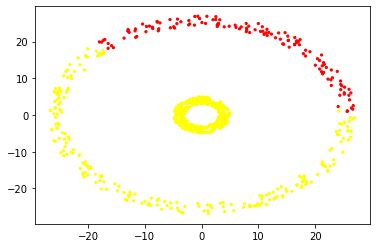

In [43]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

## Algoritmo del clustering Espectral

In [45]:
from sklearn.cluster import SpectralClustering

In [47]:
clust = SpectralClustering(2).fit_predict(data)

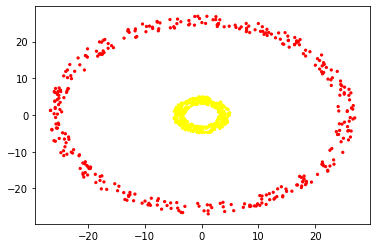

In [48]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="autumn")

* Podemos estimar la k:
    * No: La propagación de la afinidad
    * Sí: podemos usar la distancia Euclidea
        * Sí: k-means
        * No: Buscar valores centrales
            * Sí: K medoides
            * No: Los datos son linealmente separabes
                * Si: Clusterting aglomerativo
                * No: Clustering espectral
        